In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

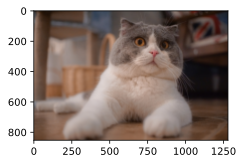

In [2]:
d2l.set_figsize()
img = d2l.plt.imread('../data/cat.jpg')
d2l.plt.imshow(img)

In [3]:
def box_corner_to_center(boxes):
    """从（左上，右下）转换到（中间，宽度，高度）"""
    x1, y1, x2, y2 = boxes[:,0], boxes[:,1], boxes[:,2], boxes[:,3]
    cx = (x1+x2)/2
    cy = (y1+y2)/2
    w = x2-x1
    h = y2-y1
    boxes = torch.stack((cx,cy,w,h), dim=1)
    return boxes

def box_center_to_corner(boxes):
    """从（中间，宽度，高度）转换到（左上，右下）"""
    cx, cy, w, h = boxes[:,0], boxes[:,1], boxes[:,2], boxes[:,3]
    x1 = cx-0.5*w
    x2 = cx+0.5*w
    y1 = cy-0.5*h
    y2 = cy+0.5*h
    boxes = torch.stack((x1, y1, x2, y2), dim=1)
    return boxes
# X = torch.tensor([[1,2,3,4],[5,7,9,11]])
# box_corner_to_center(X)

In [4]:
def bbox_to_rect(bbox, color):
    return d2l.plt.Rectangle(xy=(bbox[0], bbox[1]),
                             width=bbox[2]-bbox[0],
                             height=bbox[3]-bbox[1],
                             fill=False,
                             edgecolor=color,
                             linewidth=2)

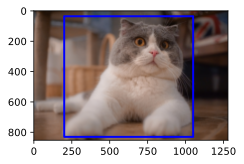

In [5]:
cat_box = [200,35,1050,830]
boxes = torch.tensor((cat_box))

fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(cat_box, 'blue'))

In [6]:
%matplotlib inline
import os
import pandas as pd
import torch
import torchvision
from d2l import torch as d2l

#@save
d2l.DATA_HUB['banana-detection'] = (
    d2l.DATA_URL + 'banana-detection.zip',
    '5de26c8fce5ccdea9f91267273464dc968d20d72')

In [7]:
#@save
def read_data_bananas(is_train=True):
    """读取香蕉检测数据集中的图像和标签"""
    data_dir = d2l.download_extract('banana-detection')
    csv_fname = os.path.join(data_dir, 'bananas_train' if is_train
                             else 'bananas_val', 'label.csv')
    csv_data = pd.read_csv(csv_fname)
    csv_data = csv_data.set_index('img_name')
    images, targets = [], []
    for img_name, target in csv_data.iterrows():
        images.append(torchvision.io.read_image(
            os.path.join(data_dir, 'bananas_train' if is_train else
                         'bananas_val', 'images', f'{img_name}')))
        # 这里的target包含（类别，左上角x，左上角y，右下角x，右下角y），
        # 其中所有图像都具有相同的香蕉类（索引为0）
        targets.append(list(target))
    # 给targets增加了一个维度，因为一个图片可能对应多个bbox
    return images, torch.tensor(targets).unsqueeze(1) / 256

In [8]:
train_data, train_label = read_data_bananas()
len(train_data)

1000

In [9]:
class BananasDataset(torch.utils.data.Dataset):
    def __init__(self, is_train):
        self.features, self.labels = read_data_bananas(is_train)
        print('read '+str(len(self.features)) + (f' training examples' if is_train else f' validation examples'))
    
    def __getitem__(self, idx):
        return (self.features[idx].float(), self.labels[idx].float())
    
    def __len__(self):
        return len(self.features)

In [10]:
def load_data_bananas(batch_size):
    train_iter = torch.utils.data.DataLoader(BananasDataset(is_train=True), batch_size=batch_size, shuffle=True)
    val_iter = torch.utils.data.DataLoader(BananasDataset(is_train=False))
    return train_iter, val_iter

In [11]:
batch_size, edge_size = 32, 256
train_iter, _ = load_data_bananas(batch_size)
batch = next(iter(train_iter))
batch[0].shape, batch[1].shape

read 1000 training examples
read 100 validation examples


(torch.Size([32, 3, 256, 256]), torch.Size([32, 1, 5]))

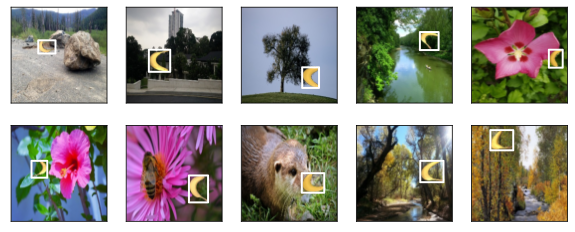

In [12]:
imgs = (batch[0][0:10].permute(0, 2, 3, 1)).int()
axes = d2l.show_images(imgs, 2, 5, scale=2)
for ax, label in zip(axes, batch[1][0:10]):
    d2l.show_bboxes(ax, [label[0][1:5] * edge_size], colors=['w'])

In [ ]:
cls_loss = nn.CrossE 